In [1]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import numpy as np

## 1.Generate some data for the analysis
Below are two datasets. Each are 3-dimensional. That is, it has three features. And there are two classes in each dataset and each class contains 500 data points. One dataset is perfectly linear separable. The other one cannot be not linearly sperated.

In [2]:
centers = [[1, 1, 1], [2, 2, 2]]
X1, y1 = make_blobs(n_samples=1000, centers=centers, n_features=3, cluster_std=0.2, random_state=88)
X2, y2 = make_blobs(n_samples=1000, centers=centers, n_features=3, cluster_std=1, random_state=88)

In [3]:
X1.shape, y1.shape, X2.shape, y2.shape

((1000, 3), (1000,), (1000, 3), (1000,))

Plot the data

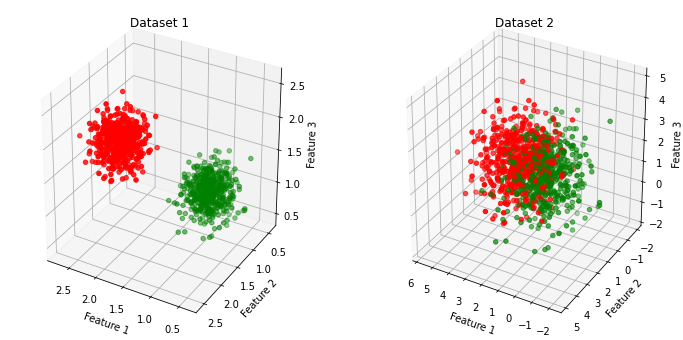

In [4]:
fig= plt.figure(figsize=(12, 6))
for i, X, y in zip([1,2], [X1,X2], [y1,y2]):
    colors = np.where(y==1, 'r', 'g')
    ax = fig.add_subplot(1, 2, i, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:, 2], c=colors, marker='o')
    ax.set(xlabel="Feature 1", ylabel="Feature 2", zlabel="Feature 3", title=f'Dataset {i}');
    ax.view_init(elev=30, azim=120);

## 2. Analysis
### 1) linear separable dataset
Below is the analysis with separable dataset. Three kernel functions are considered here. They are linear, polynomial and gaussian kerenels, respectively. There is no surprise. All of them reach 100% accuracy in separating the classes in the dataset. But this is not an interesting case to analyze.

In [5]:
svc1 = SVC(kernel='linear', probability=True) # linear kernel
svc1.fit(X1, y1).score(X1, y1)

1.0

In [6]:
svc1.set_params(kernel='poly', degree=2).fit(X1, y1).score(X1, y1) # polynomial kernel with degree 2

1.0

In [7]:
svc1.set_params(kernel='rbf', gamma=2).fit(X1, y1).score(X1, y1) #  gaussian kernel

1.0

### 2) linear non-separated dataset 
I again consider 3 kernels for the non-separated dataset. The liner kernel function has the worst performance. It reaches only 80% accuracy. But this can be regarded as a baseline when comparing with other kernels. 

In [8]:
svc2 = SVC(kernel='linear', probability=True) # linear kernel
svc2.fit(X2, y2).score(X2, y2)

0.798

In the library I used, polynomial kernel function takes the form
     $$ K(x, y) = (\gamma<x, y> + c)^d. $$
To analyze the kernel function and the effects of different parameters attached on the efficiency of separation, I fix the degree of the polynomial to be 2. Meanwhile, I vary $\gamma$ and $c$ to see how these two affects the prediction accuracies. As a practice, I also look at the effects of the degree of the polynomial kernel on the prediction accuracy. Below are the results. There are some conclusions we can get.
* With the degree being fixed, polynomial kernel function helps improve the accuracy but not that much. We can see this from the three plots. The hight accuracy is slightly above 80%, which is almost the same as the basline.
* In the range of the parameters I use,  polynomial kernel function is not sensitive to its parameters, both $\gamma$ and $c$. Once again, we can see this from the accuracy plots as well. The accuracies is between 0.799 and 0.806.

* Increasing the degree of the polynomial kernel helps improve the accuracy. This can be seen from the plot with different degrees of the polynomial kernel.

In [9]:
gammas = np.arange(1, 11)
cs = [1, 5, 10]
accuracies = []
for c in cs:
    accuracy = []
    for gamma in gammas:
        clf = SVC(kernel='poly', degree=2, coef0=c, gamma=gamma)
        pre_accuracy = clf.fit(X2, y2).score(X2, y2)
        accuracy.append(pre_accuracy)
    accuracies.append(accuracy)

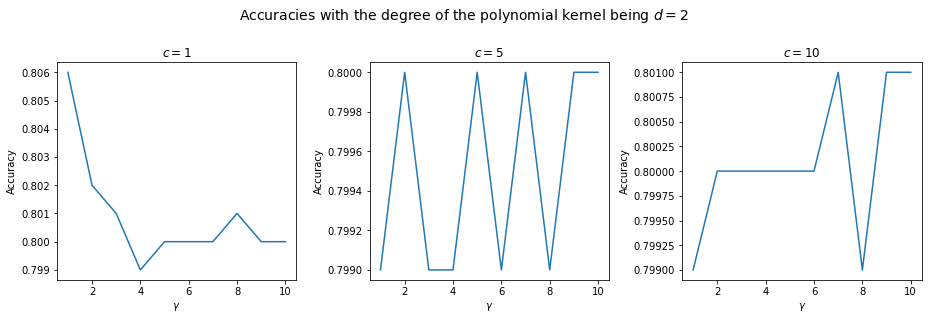

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
for ax, c, i in zip(axes, cs, np.arange(3)):
    ax.plot(gammas, accuracies[i])
    ax.set(xlabel='$\gamma$', ylabel='Accuracy', title=f'$c={c}$')
fig.suptitle('Accuracies with the degree of the polynomial kernel being $d = 2$',y=1.1, fontsize=14)
fig.tight_layout();

In [11]:
ds = np.arange(2, 21)
acc = []
for d in ds:
    clf = SVC(kernel='poly', degree=d, coef0=1, gamma=0.025)
    pre_accuracy = clf.fit(X2, y2).score(X2, y2)
    acc.append(pre_accuracy)

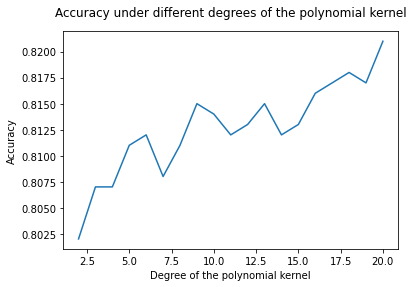

In [12]:
plt.plot(ds, acc)
plt.xlabel('Degree of the polynomial kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy under different degrees of the polynomial kernel', pad=15);

Finally, I analyze Gaussian kerenel function. In the library, it takes the form
 $$ K(x, y) = e^{-\gamma||x-y||^2}.$$
I then explore the impacts of different values of $\gamma$ on the preidction accuracies. Below is the results. The results of using Gaussian kernel are very good, as we can see from the accuracy plot below. Some conclusions:
* Gaussian kernel significantly improve the efficiency of separation. As we can see, the highest accuracy is slightly below 100%.

* The accuracy in this case is increasing with $\gamma$. A high gamma helps improve the prediction. Of course their relation is not linea since the highest accuracy is 100%.
 

In [13]:
accuracy_ = []
gammas_ = np.arange(1, 51)
for gamma in gammas_:
    clf = SVC(kernel='rbf', gamma=gamma)
    pre_accuracy = clf.fit(X2, y2).score(X2, y2)
    accuracy_.append(pre_accuracy)

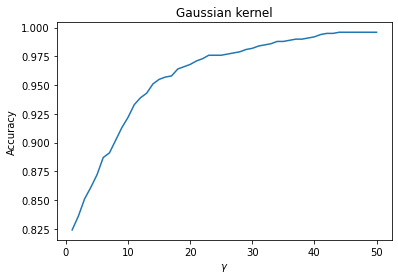

In [14]:
plt.plot(gammas_, accuracy_);
plt.xlabel('$\gamma$')
plt.ylabel('Accuracy')
plt.title('Gaussian kernel');

## 3. Some final remarks
* Kernel functions help improve the prediction accuracy. By projecting the dataset to a high dimensional space, the kernel functions are able to help seprate the dataset, though not totally.

* Compared with polynomial kernel, Gaussian kerenl is much more efficient. The reason is obvious if we think about the two functions. Polynomial kernel projects the dataset onto a finite dimensional space, though the dimension of the space increases with its degrees. But Gaussian kernel actually projects the dataset onto a infinite dimensional space. It thus allow to explore the rich combinations of the features to separate the classes.

* Though kerenl method is a very powerful tool in classification, it's hard to answer which features in the dataset are important for separation. The kernel method in some sense is like a black box. Like a neural network, it's hard to open it and check why it does what it does and what we need to do for the future data collection.